In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import os


parent_dir = "/home/tvanhout/oxides_ML/models/firsttest"

In [2]:
# Create an empty list to store data for each model
model_data = []

# Loop through each subdirectory (each containing test_set.csv and uq.csv)
for model_folder in os.listdir(parent_dir):
    model_path = os.path.join(parent_dir, model_folder)
    
    if os.path.isdir(model_path):  # Ensure it's a directory
        try:
            # Load test set results
            test_set_path = os.path.join(model_path, "test_set.csv")
            uq_path = os.path.join(model_path, "uq.csv")

            if os.path.exists(test_set_path) and os.path.exists(uq_path):
                df_test = pd.read_csv(test_set_path)
                df_uq = pd.read_csv(uq_path)

                # Compute relevant metrics
                mae = df_test["Abs_error_eV"].mean()
                
                # Append results to the list
                model_data.append({
                    "Model": model_folder,
                    "MAE": mae,
                })
        
        except Exception as e:
            print(f"Error processing {model_folder}: {e}")

df_summary = pd.DataFrame(model_data)

# Save summary to CSV
#df_summary.to_csv("model_comparison_summary.csv", index=False)

print(df_summary)


    Model       MAE
0   input  0.400298
1  test11  0.483432
2  test10  0.391857
3  test12  0.336286


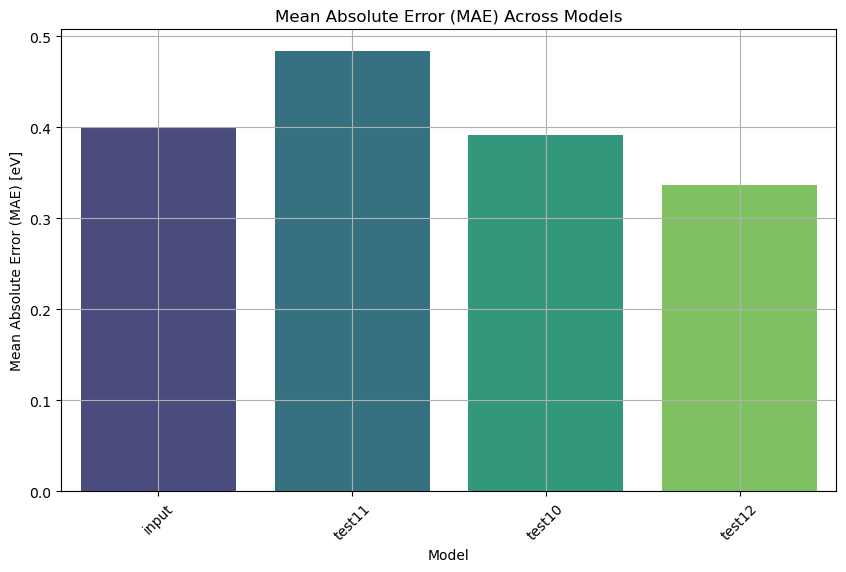

In [3]:
plt.figure(figsize=(10,6))
sns.barplot(data=df_summary, x='Model', y='MAE', hue='Model', palette='viridis', legend=False)
plt.title('Mean Absolute Error (MAE) Across Models')
plt.ylabel('Mean Absolute Error (MAE) [eV]')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


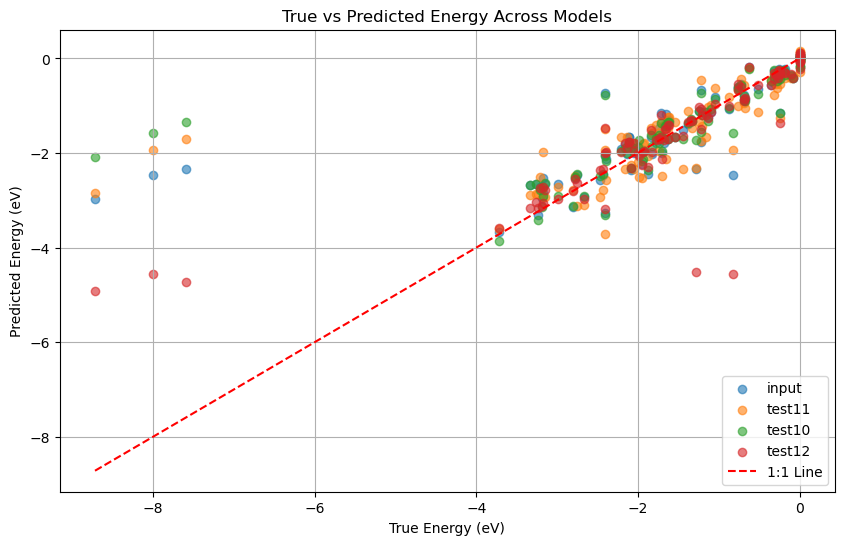

In [4]:
plt.figure(figsize=(10,6))

for model_folder in os.listdir(parent_dir):
    model_path = os.path.join(parent_dir, model_folder)
    
    if os.path.isdir(model_path):
        test_set_path = os.path.join(model_path, "test_set.csv")
        if os.path.exists(test_set_path):
            df_test = pd.read_csv(test_set_path)
            plt.scatter(df_test['True_eV'], df_test['Prediction_eV'], label=model_folder, alpha=0.6)

plt.plot([df_test['True_eV'].min(), df_test['True_eV'].max()], 
         [df_test['True_eV'].min(), df_test['True_eV'].max()], 'r--', label='1:1 Line')

plt.xlabel('True Energy (eV)')
plt.ylabel('Predicted Energy (eV)')
plt.title('True vs Predicted Energy Across Models')
plt.legend()
plt.grid(True)
plt.show()
